In [12]:
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag
import pmagpy.contribution_builder as cb
from pmagpy import convert_2_magic as convert
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
has_basemap, Basemap = pmag.import_basemap()
has_cartopy, Cartopy = pmag.import_cartopy()
try:
    import xlwt
    has_xlwt = True
except ImportError:
    has_xlwt = False
%matplotlib inline 
from IPython.display import Image
import os
import sys
import sys
import math 
import statistics

# I. Plot site-means of the sills (n=18) in geographic/sedimentary coordinates

### Databook of the site-means

In [2]:
di_block=pd.read_csv('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/Feb_2021/Summary (sites)/Sites (g+s)_with_beddings.csv',header=0)
di_block

,Site,Rock_unit,Section,Color_code,Dg,Ig,Ds,Is,k,a95,n,Pole_Long,Pole_Lat,dp,dm,Dip_dir,Dip,Sample_Lat,Sample_Long
0,HGS (05),HGS01,HGS,seagreen,310.0,-40.0,329.3,-55.6,11.5,17.1,8,134.6,-19.8,17.4,24.4,271.2,23.0,27.915556,108.635556
1,HGS (06+07),HGS01,HGS,seagreen,320.9,-43.3,344.6,-54.6,51.9,12.9,4,122.5,-25.3,12.8,18.2,271.2,23.0,27.915556,108.635556
2,HGS (08+09),HGS01,HGS,seagreen,313.1,-63.1,8.4,-72.3,44.5,6.6,12,104.1,-4.4,10.3,11.6,271.2,23.0,27.915556,108.635556
3,HW (04),HW01,HW,firebrick,350.1,13.4,5.6,-55.0,115.8,5.6,7,103.7,-26.4,5.7,8.0,330.0,74.6,27.870000,108.746389
4,HW (06),HW01,HW,firebrick,347.1,31.4,349.2,-40.4,145.0,3.5,13,121.3,-38.0,2.5,4.2,330.0,74.6,27.870000,108.746389
5,HW (20),HW02,HW,firebrick,59.6,-35.1,5.6,-39.9,176.9,18.9,2,102.1,-39.1,13.7,22.7,119.0,61.3,27.864444,108.760000
6,HW (21),HW02,HW,firebrick,46.6,-35.9,1.8,-29.8,128.8,5.3,7,106.3,-46.1,3.3,5.9,119.0,61.3,27.864444,108.760000
7,TR (43+74),JZP01,JZP,steelblue,321.7,-47.9,343.5,-40.2,13.2,35.4,3,127.7,-36.8,25.7,42.7,223.9,23.3,27.871111,108.621111
8,TR (72+73),JZP01,JZP,steelblue,320.1,-51.2,344.6,-43.5,8.7,21.7,7,125.5,-34.7,16.9,27.1,223.9,23.3,27.871111,108.621111
9,TR (49+51+52),JZP02,JZP,steelblue,326.9,-46.0,345.0,-36.1,25.3,11.2,8,127.1,-40.0,7.6,13.0,220.7,22.6,27.871111,108.621111


### All the 18 site-means (geographic & sedimentary coordinates)

Mean of the 18 sites in geographic coordinates {'dec': 336.4840497683976, 'inc': -43.51735360543643, 'n': 18, 'r': 15.43330688032146, 'k': 6.623308361121539, 'alpha95': 14.54462574633424, 'csd': 31.47368046872974}
Mean of the 18 sites in sedimentary coordinates {'dec': 350.75287062019333, 'inc': -42.89769023118805, 'n': 18, 'r': 17.543288007945353, 'k': 37.22258293135843, 'alpha95': 5.741505574084985, 'csd': 13.276443933591414}


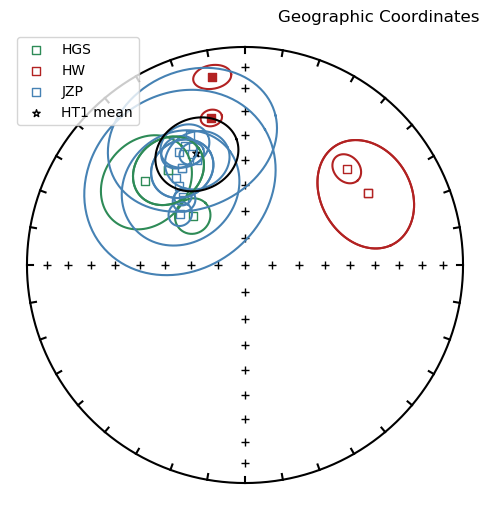

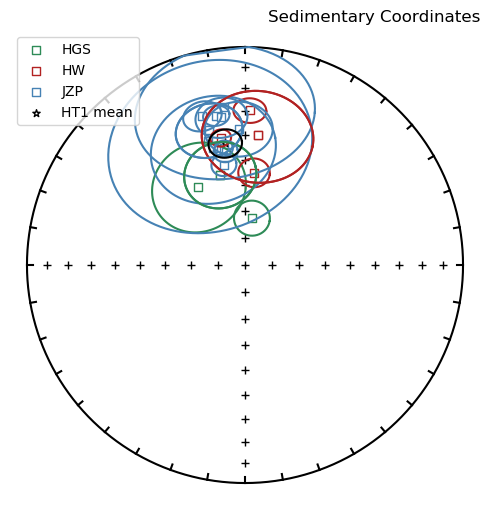

In [11]:
# Geographic coordinates
di_block=pd.read_csv('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/Feb_2021/Summary (sites)/Sites (g+s)_with_beddings.csv',header=0)
plt.figure(num=0,figsize=(5,5),dpi=100)
ipmag.plot_net(0)
dot_size=30
di_block_mean=ipmag.fisher_mean(di_block = di_block.loc[0:17,['Dg','Ig']])

for i in range(len(di_block)-2):
    ipmag.plot_di_mean(dec=di_block.loc[i,'Dg'],inc=di_block.loc[i,'Ig'],a95=di_block.loc[i,'a95'],marker='s',color=di_block.loc[i,'Color_code'],markersize=dot_size ,legend="no")

ipmag.plot_di_mean(dec=di_block.loc[1,'Dg'],inc=di_block.loc[1,'Ig'],a95=di_block.loc[1,'a95'],marker='s',color=di_block.loc[1,'Color_code'],markersize=dot_size ,label= di_block.loc[1,'Section'],legend="yes")
ipmag.plot_di_mean(dec=di_block.loc[5,'Dg'],inc=di_block.loc[5,'Ig'],a95=di_block.loc[5,'a95'],marker='s',color=di_block.loc[5,'Color_code'],markersize=dot_size ,label= di_block.loc[5,'Section'],legend="yes")
ipmag.plot_di_mean(dec=di_block.loc[9,'Dg'],inc=di_block.loc[9,'Ig'],a95=di_block.loc[9,'a95'],marker='s',color=di_block.loc[9,'Color_code'],markersize=dot_size ,label= di_block.loc[9,'Section'],legend="yes")

ipmag.plot_di_mean(dec=di_block_mean['dec'],inc=di_block_mean['inc'],a95=di_block_mean['alpha95'],marker='*',color='black',markersize=dot_size ,label='HT1 mean',legend="yes")

title = plt.title('Geographic Coordinates', fontdict=None, loc='right', pad=None)
print('Mean of the 18 sites in geographic coordinates',di_block_mean)

# Sedimentary coordinates
plt.figure(num=1,figsize=(5,5),dpi=100)
ipmag.plot_net(1)
dot_size=30
di_block_mean=ipmag.fisher_mean(di_block = di_block.loc[0:17,['Ds','Is']])

for i in range(len(di_block)-2):
    ipmag.plot_di_mean(dec=di_block.loc[i,'Ds'],inc=di_block.loc[i,'Is'],a95=di_block.loc[i,'a95'],marker='s',color=di_block.loc[i,'Color_code'],markersize=dot_size ,legend="no")

ipmag.plot_di_mean(dec=di_block.loc[1,'Ds'],inc=di_block.loc[1,'Is'],a95=di_block.loc[1,'a95'],marker='s',color=di_block.loc[1,'Color_code'],markersize=dot_size ,label= di_block.loc[1,'Section'],legend="yes")
ipmag.plot_di_mean(dec=di_block.loc[5,'Ds'],inc=di_block.loc[5,'Is'],a95=di_block.loc[5,'a95'],marker='s',color=di_block.loc[5,'Color_code'],markersize=dot_size ,label= di_block.loc[5,'Section'],legend="yes")
ipmag.plot_di_mean(dec=di_block.loc[9,'Ds'],inc=di_block.loc[9,'Is'],a95=di_block.loc[9,'a95'],marker='s',color=di_block.loc[9,'Color_code'],markersize=dot_size ,label= di_block.loc[9,'Section'],legend="yes")
ipmag.plot_di_mean(dec=di_block_mean['dec'],inc=di_block_mean['inc'],a95=di_block_mean['alpha95'],marker='*',color='black',markersize=dot_size ,label='HT1 mean',legend="yes")

title = plt.title('Sedimentary Coordinates', fontdict=None, loc='right', pad=None)
print('Mean of the 18 sites in sedimentary coordinates',di_block_mean)

# II. Demonstrate the baked-contact test in geographic coordinates

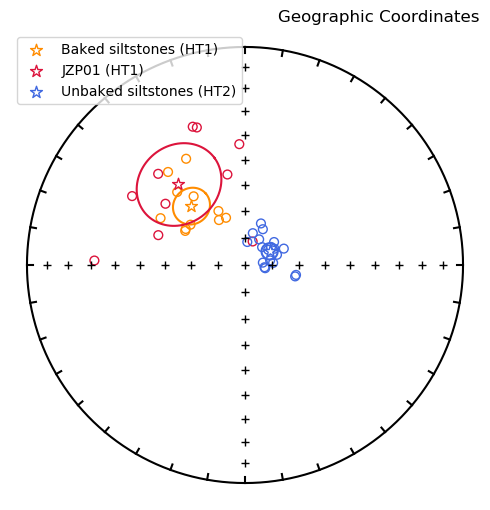

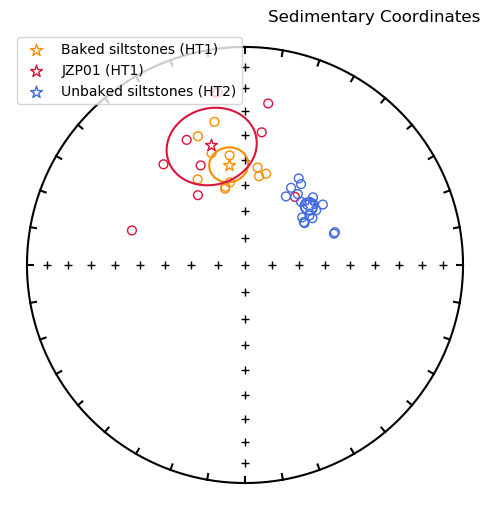

In [25]:
# Geographic coordinates
di_block1=np.loadtxt('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/Feb_2021/Baked/csv/Baked.txt')
mode_1_fpars=ipmag.fisher_mean(di_block=di_block1)

di_block2=np.loadtxt('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/Feb_2021/JZP01/csv/JZP01_text.txt')
mode_2_fpars=ipmag.fisher_mean(di_block=di_block2)

di_block3=np.loadtxt('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/Feb_2021/Unbaked/csv/Unbaked.txt')
mode_3_fpars=ipmag.fisher_mean(di_block=di_block3)

plt.figure(num=0,figsize=(5,5),dpi=100)
ipmag.plot_net(0)

ipmag.plot_di(markersize=40,di_block=di_block1,color='darkorange',edge='black')
ipmag.plot_di_mean(dec=mode_1_fpars['dec'],inc=mode_1_fpars['inc'],a95=mode_1_fpars['alpha95'],\
                  marker='*',color='darkorange',markersize=80,label='Baked siltstones (HT1)',legend="yes")

ipmag.plot_di(markersize=40,di_block=di_block2,color='crimson',edge='black')
ipmag.plot_di_mean(dec=mode_2_fpars['dec'],inc=mode_2_fpars['inc'],a95=mode_2_fpars['alpha95'],\
                  marker='*',color='crimson',markersize=80,label='JZP01 (HT1)',legend="yes")

ipmag.plot_di(markersize=40,di_block=di_block3,color='royalblue',edge='black')
ipmag.plot_di_mean(dec=mode_3_fpars['dec'],inc=mode_3_fpars['inc'],a95=mode_3_fpars['alpha95'],\
                  marker='*',color='royalblue',markersize=80,label='Unbaked siltstones (HT2)',legend="yes")

title = plt.title('Geographic Coordinates', fontdict=None, loc='right', pad=None)

# Sedimentary coordinates
di_block1=np.loadtxt('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/Feb_2021/Baked/csv/Baked_(s).txt')
mode_1_fpars=ipmag.fisher_mean(di_block=di_block1)

di_block2=np.loadtxt('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/Feb_2021/JZP01/csv/JZP01_text_(s).txt')
mode_2_fpars=ipmag.fisher_mean(di_block=di_block2)

di_block3=np.loadtxt('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/Feb_2021/Unbaked/csv/Unbaked_(s).txt')
mode_3_fpars=ipmag.fisher_mean(di_block=di_block3)

plt.figure(num=1,figsize=(5,5),dpi=100)
ipmag.plot_net(1)

ipmag.plot_di(markersize=40,di_block=di_block1,color='darkorange',edge='black')
ipmag.plot_di_mean(dec=mode_1_fpars['dec'],inc=mode_1_fpars['inc'],a95=mode_1_fpars['alpha95'],\
                  marker='*',color='darkorange',markersize=80,label='Baked siltstones (HT1)',legend="yes")

ipmag.plot_di(markersize=40,di_block=di_block2,color='crimson',edge='black')
ipmag.plot_di_mean(dec=mode_2_fpars['dec'],inc=mode_2_fpars['inc'],a95=mode_2_fpars['alpha95'],\
                  marker='*',color='crimson',markersize=80,label='JZP01 (HT1)',legend="yes")

ipmag.plot_di(markersize=40,di_block=di_block3,color='royalblue',edge='black')
ipmag.plot_di_mean(dec=mode_3_fpars['dec'],inc=mode_3_fpars['inc'],a95=mode_3_fpars['alpha95'],\
                  marker='*',color='royalblue',markersize=80,label='Unbaked siltstones (HT2)',legend="yes")

title = plt.title('Sedimentary Coordinates', fontdict=None, loc='right', pad=None)

### Watson V-test for the Baked-zone test  (geographic coordinates)

Results of Watson V test: 

Watson's V:           2.5
Critical value of V:  6.8
"Pass": Since V is less than Vcrit, the null hypothesis
that the two populations are drawn from distributions
that share a common mean direction can not be rejected.

M&M1990 classification:

Angle between data set means: 10.0
Critical angle for M&M1990:   16.7
The McFadden and McElhinny (1990) classification for
this test is: 'C'


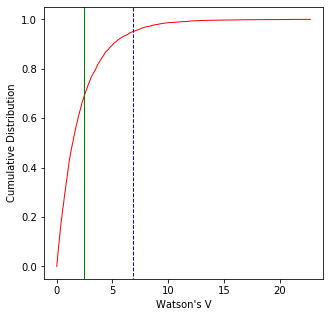

<Figure size 252x180 with 0 Axes>

In [57]:
plot = plt.figure(1,(5,5))
results = ipmag.common_mean_watson(di_block1,di_block2,plot='yes')

# III. Fold test on the 18 site-means of the sills

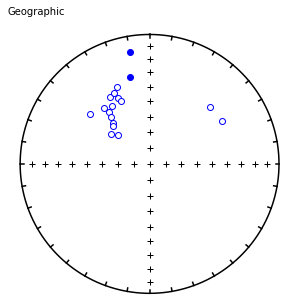

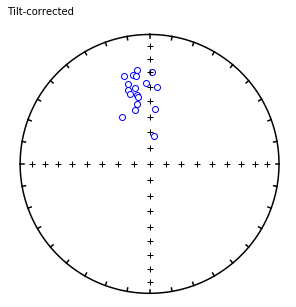

doing  1000  iterations...please be patient.....

tightest grouping of vectors obtained at (95% confidence bounds):
70 - 108 percent unfolding
range of all bootstrap samples: 
-10  -  119 percent unfolding


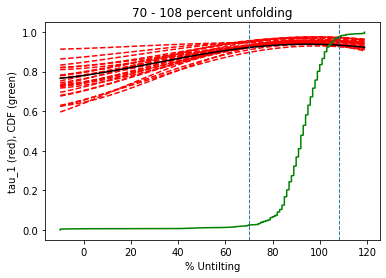

In [28]:
# Fold test for all 18 site-mean directions
data=np.loadtxt('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/Feb_2021/Summary (sites)/Sites (g)_with_beddings.txt')
ipmag.bootstrap_fold_test(data, num_sims=1000,save=False, save_folder='/Users/hairuo/Desktop/', fmt='pdf', ninety_nine=False)

# IV. Step-unfolding test on the 18 site-means

In [30]:
# Function for the step-unfolding test

def step_unfolding (direction='',xrange=[0,1.5,0.05],pty='go'):

    # Input: (1) direction = the path of the txt file (!!! must be the path);
    
    #        Optional: (2) xrange = [min,max,by]; default is [0,1.51,0.05]
    #                  (3) pty = ''; default is 'go'             
    
    # Creat a new table which has the same data structure as the original data
    
    # Creat steps of the step-unfolding: arange(min, max, by)
    step=np.arange(xrange[0],xrange[1]+xrange[2],xrange[2])
    
    # Get the length of the step, which can be used further
    length=len(step)
    
    # Creat "results" to store the 'k' values. The length of it is determined by the length of the step)
    results=list(range(0,length))
    
    # Creat "Order" to help storing data into "results"
    order=list(range(0,length))
    
    # The For Loop to do the progressisve unfolding
    for i in range(0,length):    
        di_block1=np.loadtxt(direction)
        # Have to read the original data again... Need to fix it later
        di_block1[:,3] = step[i]*di_block1[:,3]
        di_block2=pmag.dotilt_V(di_block1)
        di_block_mean1=ipmag.fisher_mean(di_block=np.column_stack(di_block2))
        results[order[i]] = di_block_mean1['k']
             
    # Now the "k" data is all saved in "results"   
    
    # Plot the results 
    plt.plot(step*100,results,pty,step*100,results,'k')
    plt.xlabel('Percentage of unfolding (%)')
    plt.ylabel('Precision parameter (k)')
    plt.grid(True)  
    
    return ()

Maximum K reaches at 92% unfolding


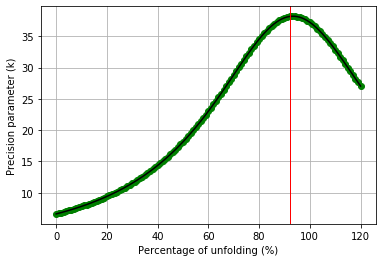

In [31]:
# step-unfolding test for all the 18 site means
step_unfolding(direction='/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/Feb_2021/Summary (sites)/Sites (g)_with_beddings.txt',xrange=[0,1.2,0.01])

vline = plt.axvline(x=92,linewidth=1, color='r')

print('Maximum K reaches at 92% unfolding')

# V. Comparing the means calculated from sites (N=18) and samples (N=125), sedimentary coordinates 
## -- not significantly different

In [21]:
# The mean of HT1 of all sites (n=18), sedimentary coordinates 
data=pd.read_csv('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/Feb_2021/Summary (sites)/Sites (g+s)_with_beddings.csv',header=0)
ipmag.fisher_mean(di_block = data.loc[0:17,['Ds','Is']])

{'dec': 350.75287062019333,
 'inc': -42.89769023118805,
 'n': 18,
 'r': 17.543288007945353,
 'k': 37.22258293135843,
 'alpha95': 5.741505574084985,
 'csd': 13.276443933591414}

In [22]:
# The mean of HT1 of all samples (n=125), sedimentary coordinates 
data=np.loadtxt('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/Feb_2021/Summary/n125_sample (s).txt')
ipmag.fisher_mean(di_block = data[:,(0,1)])

{'dec': 350.3758629088815,
 'inc': -44.08212504774035,
 'n': 125,
 'r': 118.71217083653804,
 'k': 19.720637564479862,
 'alpha95': 2.9164614621192135,
 'csd': 18.239987784171497}

# VI. Comparing the paleomagnetic poles calculated from VGP-sites (N=18) and VGP-samples (N=125) 
## -- not significantly different

In [34]:
vgp=pd.read_csv('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/Feb_2021/Summary (sites)/VGPs/Sites (s)_dp_dm.csv',header=0) 
vgp

,Site,Pole_Long,Pole_Lat,dp,dm
0,HGS (05),134.610870,-19.770510,17.405736,24.364313
1,HGS (06+07),122.516807,-25.259263,12.841263,18.180965
2,HGS (08+09),104.083000,-4.382460,10.291851,11.635671
3,HW (04),103.670255,-26.386213,5.670039,7.992956
4,HW (06),121.349451,-38.035932,2.521053,4.173275
5,HW (20),102.077664,-39.138892,13.667209,22.723261
6,HW (21),106.299951,-46.137381,3.275081,5.913432
7,TR (43+74),127.711685,-36.810095,25.733974,42.692771
8,TR (72+73),125.549851,-34.717872,16.856627,27.063207
9,TR (49+51+52),127.060933,-39.961017,7.586289,13.048883


### Paleomagnetic pole calculated using VGPS of sites (N=18)

In [36]:
vgp=np.loadtxt('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/Feb_2021/Summary (sites)/VGPs/Sites (s)_dp_dm.txt') 
ipmag.fisher_mean(di_block=vgp[:,(0,1)])

{'dec': 118.79556517997139,
 'inc': -35.33101798577623,
 'n': 18,
 'r': 17.543571555645336,
 'k': 37.245706770172916,
 'alpha95': 5.739675087128395,
 'csd': 13.2723219818116}

### Paleomagnetic pole calculated using VGPS of samples (N=125)

In [38]:
data=np.loadtxt('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/Feb_2021/Summary/VGPs/125 samples_Vgps.txt')
ipmag.fisher_mean(di_block=data)

{'dec': 118.60391980014127,
 'inc': -33.48558476766244,
 'n': 125,
 'r': 117.76456980449446,
 'k': 17.13788906111284,
 'alpha95': 3.1411295966449395,
 'csd': 19.566194000958905}

# VII. Paleosecular variation test -- A95 method (Deenen et al. 2011)

### Calculate the critical values for A95 at the site level (N=18)

In [74]:
N=18
A95min=12*(N)**(-0.4)
A95max=82*(N)**(-0.63)
A95_critical_values = [A95min,A95max]
print("A95 critical values (n=18) is --", A95_critical_values)
print('Our A95 = 5.7 (n=18) passes the test!')

A95 critical values (n=18) is -- [3.7763500451796075, 13.273705387714697]
Our A95 = 5.7 (n=18) passes the test!


### Calculate the critical values for A95 at the sample level (N=125)

In [9]:
N=125
A95min=12*(N)**(-0.4)
A95max=82*(N)**(-0.63)
A95_critical_values = [A95min,A95max]
print("A95 critical values (n=125) is --", A95_critical_values)
print('Our A95 = 3.1 (n=125) passes the test')

A95 critical values (n=125) is -- [1.739471192826469, 3.915259429497095]
Our A95 = 3.1 (n=125) passes the test


# VIII. Paleosecular variation test -- VGP scatter method (Doell 1970)

In [39]:
vgp=pd.read_csv('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/Feb_2021/Summary (sites)/VGPs/Sites (s)_Plong_plat_k_n_Is..csv',header=0) 
vgp

,Site,Pole_Long,Pole_Lat,k,n,Is
0,HGS (05),134.610870,-19.770510,11.505762,8,-55.562340
1,HGS (06+07),122.516807,-25.259263,51.928536,4,-54.643353
2,HGS (08+09),104.083000,-4.382460,44.511422,12,-72.270903
3,HW (04),103.670255,-26.386213,115.766014,7,-54.995221
4,HW (06),121.349451,-38.035932,145.008250,13,-40.391738
5,HW (20),102.077664,-39.138892,176.889763,2,-39.926190
6,HW (21),106.299951,-46.137381,128.813265,7,-29.776073
7,TR (43+74),127.711685,-36.810095,13.178113,3,-40.158509
8,TR (72+73),125.549851,-34.717872,8.671530,7,-43.517103
9,TR (49+51+52),127.060933,-39.961017,25.317326,8,-36.098636


### ST for VGPs (N=18)

In [27]:
# The input text should contain 5 columns -- 1.VGP_long 2.VGP_lat 3.k (precision parameter) 4.n (sample numbber for each VGP) 5.Inclination for each VGP 
vgp=np.loadtxt('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/Feb_2021/Summary (sites)/VGPs/Sites (s)_Plong_plat_k_n_Is..txt') 
mean_vgp,r=pmag.vector_mean(vgp[:,(0,1)])
summ=0
for i in range(0,len(vgp)):
    summ=summ+(pmag.angle(mean_vgp[0:2],vgp[i,[0,1]]))**2/(len(vgp)-1)
ST = math.sqrt(summ)
print('ST =',ST)

ST = 13.37206981962723


### SB for VGPs (N=18)

In [84]:
vgp=np.loadtxt('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/Feb_2021/Summary (sites)/VGPs/Sites (s)_Plong_plat_k_n_Is.txt')
mean_vgp,r=pmag.vector_mean(vgp[:,(0,1)])

plat_calc=pmag.plat(vgp[:,4])
summ=0

for i in range(0,len(vgp)):
    K=vgp[i,2]*(((1/8)*(5+18*((math.sin(math.pi*plat_calc[i]/180))**2)+9*((math.sin(math.pi*plat_calc[i]/180))**4)))**(-1))
    SW=81/((K)**(1/2))
    summm=((pmag.angle(mean_vgp[0:2],vgp[i,[0,1]]))**2)-(SW**(2)/vgp[i,3])
    summ=summ+summm
    
SB=(summ/(len(vgp)-1))**(1/2)
print('SB =',SB)

SB = [11.70808917]


### Calculate the expected S-values in model-G (Veikko 2014)

In [8]:
bmin=10.07-0.54
bmax=10.07+0.54
amin=0.26-0.04
amax=0.26+0.04

plat=-24.91859562786275 # calculate using [Is = -42.896] of the mean of the 18 sites

Smin=(((amin*plat)**2)+bmin**2)**(1/2)
Smax=(((amax*plat)**2)+bmax**2)**(1/2)

S_range = [Smin,Smax]

print('Expected S =',S_range)
print("Our SB = 11.7 (N=18) falls right in the expected range")

Expected S = [10.994281338511541, 12.97907457124138]
Our SB = 11.7 (N=18) falls right in the expected range


### (n-1) Jack Knief Method to calculate 95% CI for SB

In [3]:
vgp=np.loadtxt('/Users/hairuo/Dropbox/Hairuo_projects/FJS_sills/FJS_data/DATA_for_paper/paleomag/Feb_2021/Summary (sites)/VGPs/Sites (s)_Plong_plat_k_n_Is.txt')

SB=list(range(0,len(vgp)))

for k in range(0,len(vgp)):
    vgp_JN=np.delete(vgp,k,0)
    mean_vgp,r=pmag.vector_mean(vgp_JN[:,(0,1)])
    plat_calc=pmag.plat(vgp_JN[:,4])
    summ=0
    
    for i in range(0,len(vgp_JN)):
        K=vgp_JN[i,2]*(((1/8)*(5+18*(math.sin(math.pi*plat_calc[i]/180)**2)+9*(math.sin(math.pi*plat_calc[i]/180)**4)))**(-1))
        SW=81/((K)**(1/2))
        summm=((pmag.angle(mean_vgp[0:2],vgp_JN[i,[0,1]]))**2)-(SW**(2)/vgp_JN[i,3])
        summ=summ+summm
        
    SB[k]=(summ/(len(vgp_JN)-1))**(1/2)

# calculate the 95% CI for JN data
mean_SB=np.mean(SB)
SB_var=len(vgp_JN)*np.var(SB,ddof=0)

SB_CI = [mean_SB-1.96*((SB_var)**(1/2)), mean_SB+1.96*((SB_var)**(1/2))]

print('95% CI of SB =',SB_CI)

95% CI of SB = [5.057607270220064, 18.288436204038515]
